In [1]:
import numpy as np
from scipy.special import erf
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as patches

%matplotlib inline

## Make fake data

In [2]:
x = np.arange(0, 100)
y1 = 0.5*np.exp(-(x-50)**2/(200*4)) + 0.05*np.exp(-(x-50)**2/(2*4))
y2 = 0.3*np.exp(-(x-50)**2/(30*4))
y3 = 0.5*np.exp(-(x-50)**2/(2*4)) - 0.07*np.exp(-(x-50)**2/(2*40))

M1 = np.random.rand(40,40)
M2 = np.random.rand(40,40) - 0.5

## Create figure

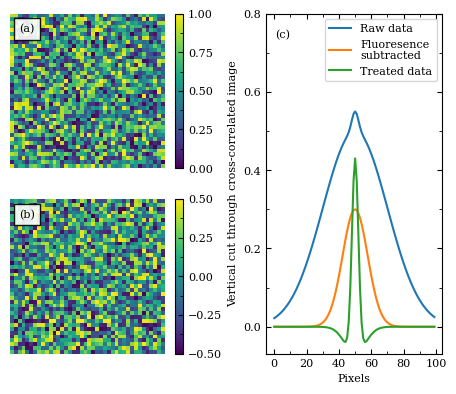

In [3]:
fig = plt.figure(figsize=(5, 4))

gs = GridSpec(2,2, width_ratios=[1.1, 0.9])

for g, M, label in zip([gs[0,0], gs[1,0]], [M1, M2], 'ab'):
    ax = plt.subplot(g)
    vmin = np.round(M.min(), 1)
    vmax = np.round(M.max(), 1)
    im = ax.imshow(M, vmin=vmin, vmax=vmax)
    cbar = plt.colorbar(im, ax=ax)
    ax.axis('off')
    cbar.set_ticks(np.arange(vmin, vmax+0.0001, 0.25))
    cbar.ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.text(0.11, 0.9, '({})'.format(label), 
            verticalalignment='center', horizontalalignment='center',
            transform=ax.transAxes,
           bbox={'facecolor':'w', 'alpha':0.9}) #, 'pad':10


ax2 = plt.subplot(gs[:,1])
ax2.plot(x, y1, label='Raw data')
ax2.plot(x, y2, label='Fluoresence\nsubtracted')
ax2.plot(x, y3, label='Treated data')

ax2.set_xlabel('Pixels')
ax2.set_ylabel('Vertical cut through cross-correlated image')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax2.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax2.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
ax2.set_ylim(top=0.8)
ax2.legend()
ax2.text(0.05, 0.93, '(c)', transform=ax2.transAxes)

fig.subplots_adjust(left=0.05, right=0.95, bottom=0.1, top=0.95, wspace=.3)
fig.savefig('ex_07_multi_panel.pdf', dpi=600)